In [11]:
import tensorflow as tf
from tensorflow import keras
from keras import models, layers
from tensorflow.keras.applications.convnext import ConvNeXtBase
from tensorflow.keras.applications.convnext import ConvNeXtSmall
from tensorflow.keras.applications.convnext import ConvNeXtLarge
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [12]:
datagen = ImageDataGenerator(
    horizontal_flip = True,
    zoom_range = 0.3,
    brightness_range=(True, 0.2),
    width_shift_range=0.1,
    height_shift_range=0.1,
    validation_split = 0.2
)

In [3]:
convBase_model = ConvNeXtBase(weights='imagenet', include_top=False, input_shape=(224,224,3))


350926856/350926856 [==============================] - 2s 0us/step


In [4]:
convsmall_model = ConvNeXtSmall(weights='imagenet', include_top=False, input_shape=(224,224,3))

198551472/198551472 [==============================] - 1s 0us/step


In [5]:
convlarge_model = ConvNeXtLarge(weights='imagenet', include_top=False, input_shape=(224,224,3))

785596384/785596384 [==============================] - 8s 0us/step


In [6]:
dic={'convBase':convBase_model,
       'convsmall':convsmall_model,
       'convlarge':convlarge_model
}

In [7]:
data = "/content/drive/MyDrive/Dataset and notebook/AIDER"

In [10]:
train_data = datagen.flow_from_directory(
    data,
    target_size = (224,224),
    batch_size = 16,
    class_mode = 'categorical',
    subset = "training"
)
valid_data = datagen.flow_from_directory(
     data,
    target_size = (224,224),
    batch_size = 16,
    class_mode = 'categorical',
    subset = "validation"
)

Found 5155 images belonging to 5 classes.
Found 1288 images belonging to 5 classes.


loading convBase
Epoch 1/20
323/323 [==============================] - 1988s 6s/step - loss: 2.7068 - accuracy: 0.5447 - val_loss: 0.9934 - val_accuracy: 0.6980
Epoch 2/20
323/323 [==============================] - 115s 356ms/step - loss: 1.1168 - accuracy: 0.6603 - val_loss: 0.9889 - val_accuracy: 0.6840
Epoch 3/20
323/323 [==============================] - 115s 355ms/step - loss: 1.0253 - accuracy: 0.6791 - val_loss: 0.9440 - val_accuracy: 0.6902
Epoch 4/20
323/323 [==============================] - 131s 407ms/step - loss: 0.9834 - accuracy: 0.6826 - val_loss: 0.9651 - val_accuracy: 0.6894
Epoch 5/20
323/323 [==============================] - 132s 409ms/step - loss: 0.9865 - accuracy: 0.6840 - val_loss: 0.9359 - val_accuracy: 0.6925
Epoch 6/20
323/323 [==============================] - 115s 355ms/step - loss: 0.9660 - accuracy: 0.6867 - val_loss: 0.9526 - val_accuracy: 0.6856
Epoch 7/20
323/323 [==============================] - 116s 359ms/step - loss: 0.9636 - accuracy: 0.6823 - val

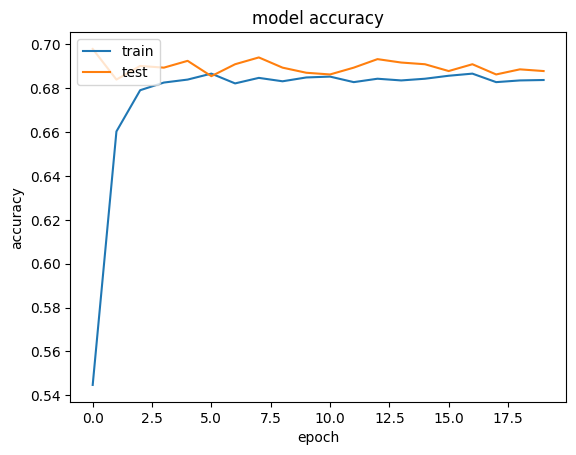

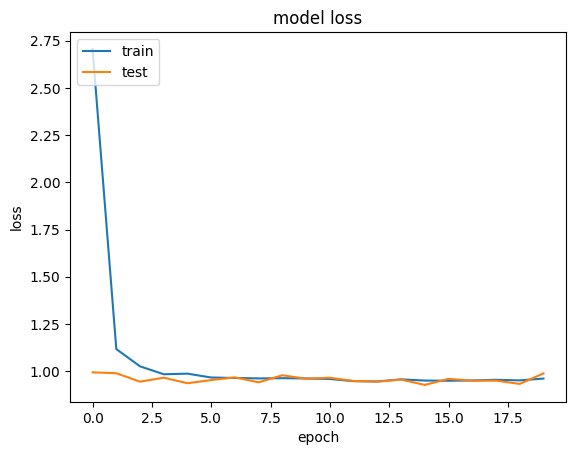

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


loading convsmall
Epoch 1/20
323/323 [==============================] - 114s 350ms/step - loss: 2.9048 - accuracy: 0.5379 - val_loss: 1.2890 - val_accuracy: 0.6832
Epoch 2/20
323/323 [==============================] - 133s 413ms/step - loss: 1.1790 - accuracy: 0.6454 - val_loss: 0.9834 - val_accuracy: 0.6848
Epoch 3/20
323/323 [==============================] - 115s 356ms/step - loss: 1.0406 - accuracy: 0.6749 - val_loss: 0.9719 - val_accuracy: 0.6863
Epoch 4/20
323/323 [==============================] - 115s 357ms/step - loss: 0.9990 - accuracy: 0.6819 - val_loss: 1.0025 - val_accuracy: 0.6840
Epoch 5/20
323/323 [==============================] - 132s 410ms/step - loss: 0.9840 - accuracy: 0.6854 - val_loss: 0.9475 - val_accuracy: 0.6902
Epoch 6/20
323/323 [==============================] - 116s 358ms/step - loss: 0.9795 - accuracy: 0.6836 - val_loss: 0.9730 - val_accuracy: 0.6887
Epoch 7/20
323/323 [==============================] - 133s 411ms/step - loss: 0.9641 - accuracy: 0.6840 - 

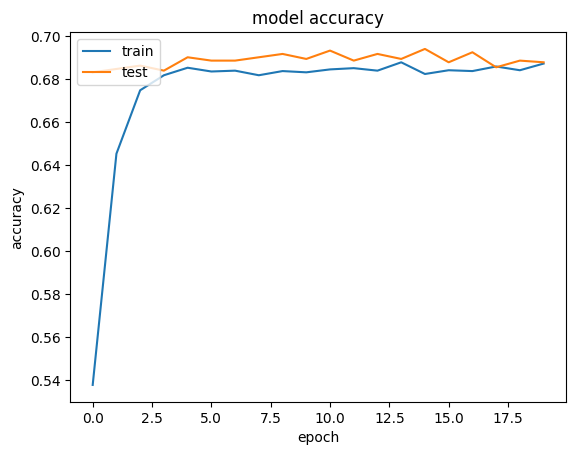

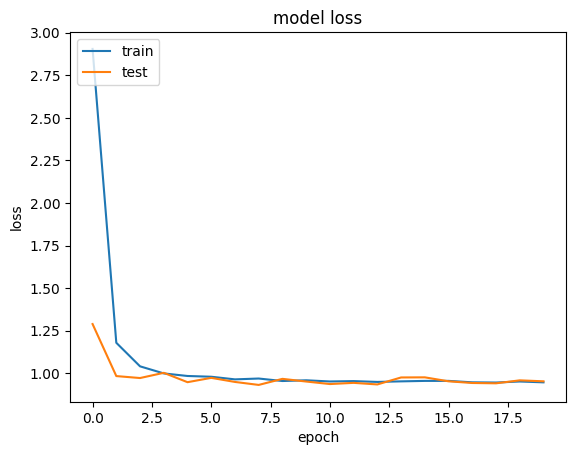

loading convlarge
Epoch 1/20
323/323 [==============================] - 116s 357ms/step - loss: 2.8565 - accuracy: 0.5344 - val_loss: 1.0900 - val_accuracy: 0.6592
Epoch 2/20
323/323 [==============================] - 131s 407ms/step - loss: 1.1320 - accuracy: 0.6642 - val_loss: 0.9867 - val_accuracy: 0.6848
Epoch 3/20
323/323 [==============================] - 115s 356ms/step - loss: 1.0346 - accuracy: 0.6791 - val_loss: 0.9839 - val_accuracy: 0.6925
Epoch 4/20
323/323 [==============================] - 131s 407ms/step - loss: 0.9986 - accuracy: 0.6840 - val_loss: 0.9484 - val_accuracy: 0.6957
Epoch 5/20
323/323 [==============================] - 115s 356ms/step - loss: 0.9834 - accuracy: 0.6830 - val_loss: 0.9609 - val_accuracy: 0.6941
Epoch 6/20
323/323 [==============================] - 112s 347ms/step - loss: 0.9594 - accuracy: 0.6846 - val_loss: 0.9468 - val_accuracy: 0.6941
Epoch 7/20
323/323 [==============================] - 113s 349ms/step - loss: 0.9629 - accuracy: 0.6824 - 

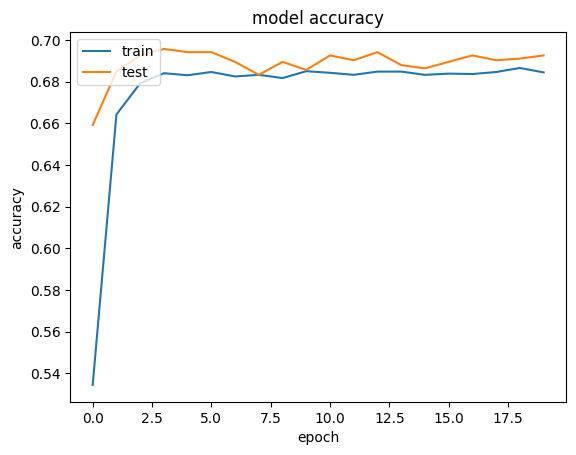

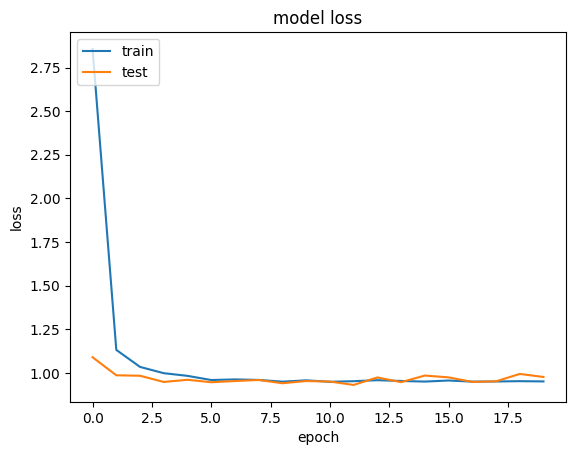

In [15]:
for model_name, model in dic.items():
  print(f"loading {model_name}")
  base_model=model
  for layer in base_model.layers:
      layer.trainable=False

  model = models.Sequential([
      layers.GlobalAveragePooling2D(),
      layers.Dense(512, activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(5, activation = 'softmax')
      ])
  model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
  history = model.fit(train_data, epochs=20, validation_data=valid_data)



      # summarize history for accuracy
  print(f"Graph of model {model_name}")
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
    # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

  model.save(f'{model_name}.h5')